In [20]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline() # Use Plotly locally

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [21]:
df = pd.read_csv('merged_rental_hyderabad.csv')

In [22]:
prop_list = ['Penthouse', 'Studio Apartment','Service Apartment']

df1 = df[df['property_type'].isin(prop_list)]

In [23]:
df1.shape

(126, 20)

In [24]:
locations = df1['locality'].value_counts()
locations = dict(locations)
list1 = locations.keys()
list2 = locations.values()
locations_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','count'])

fig = px.bar(locations_df[0:10],y='locality', x='count', text='count',orientation='h',
            labels={'count':'Count'}, color='count', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Top locations by Listings Count (Studio, Penthouse, Service Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

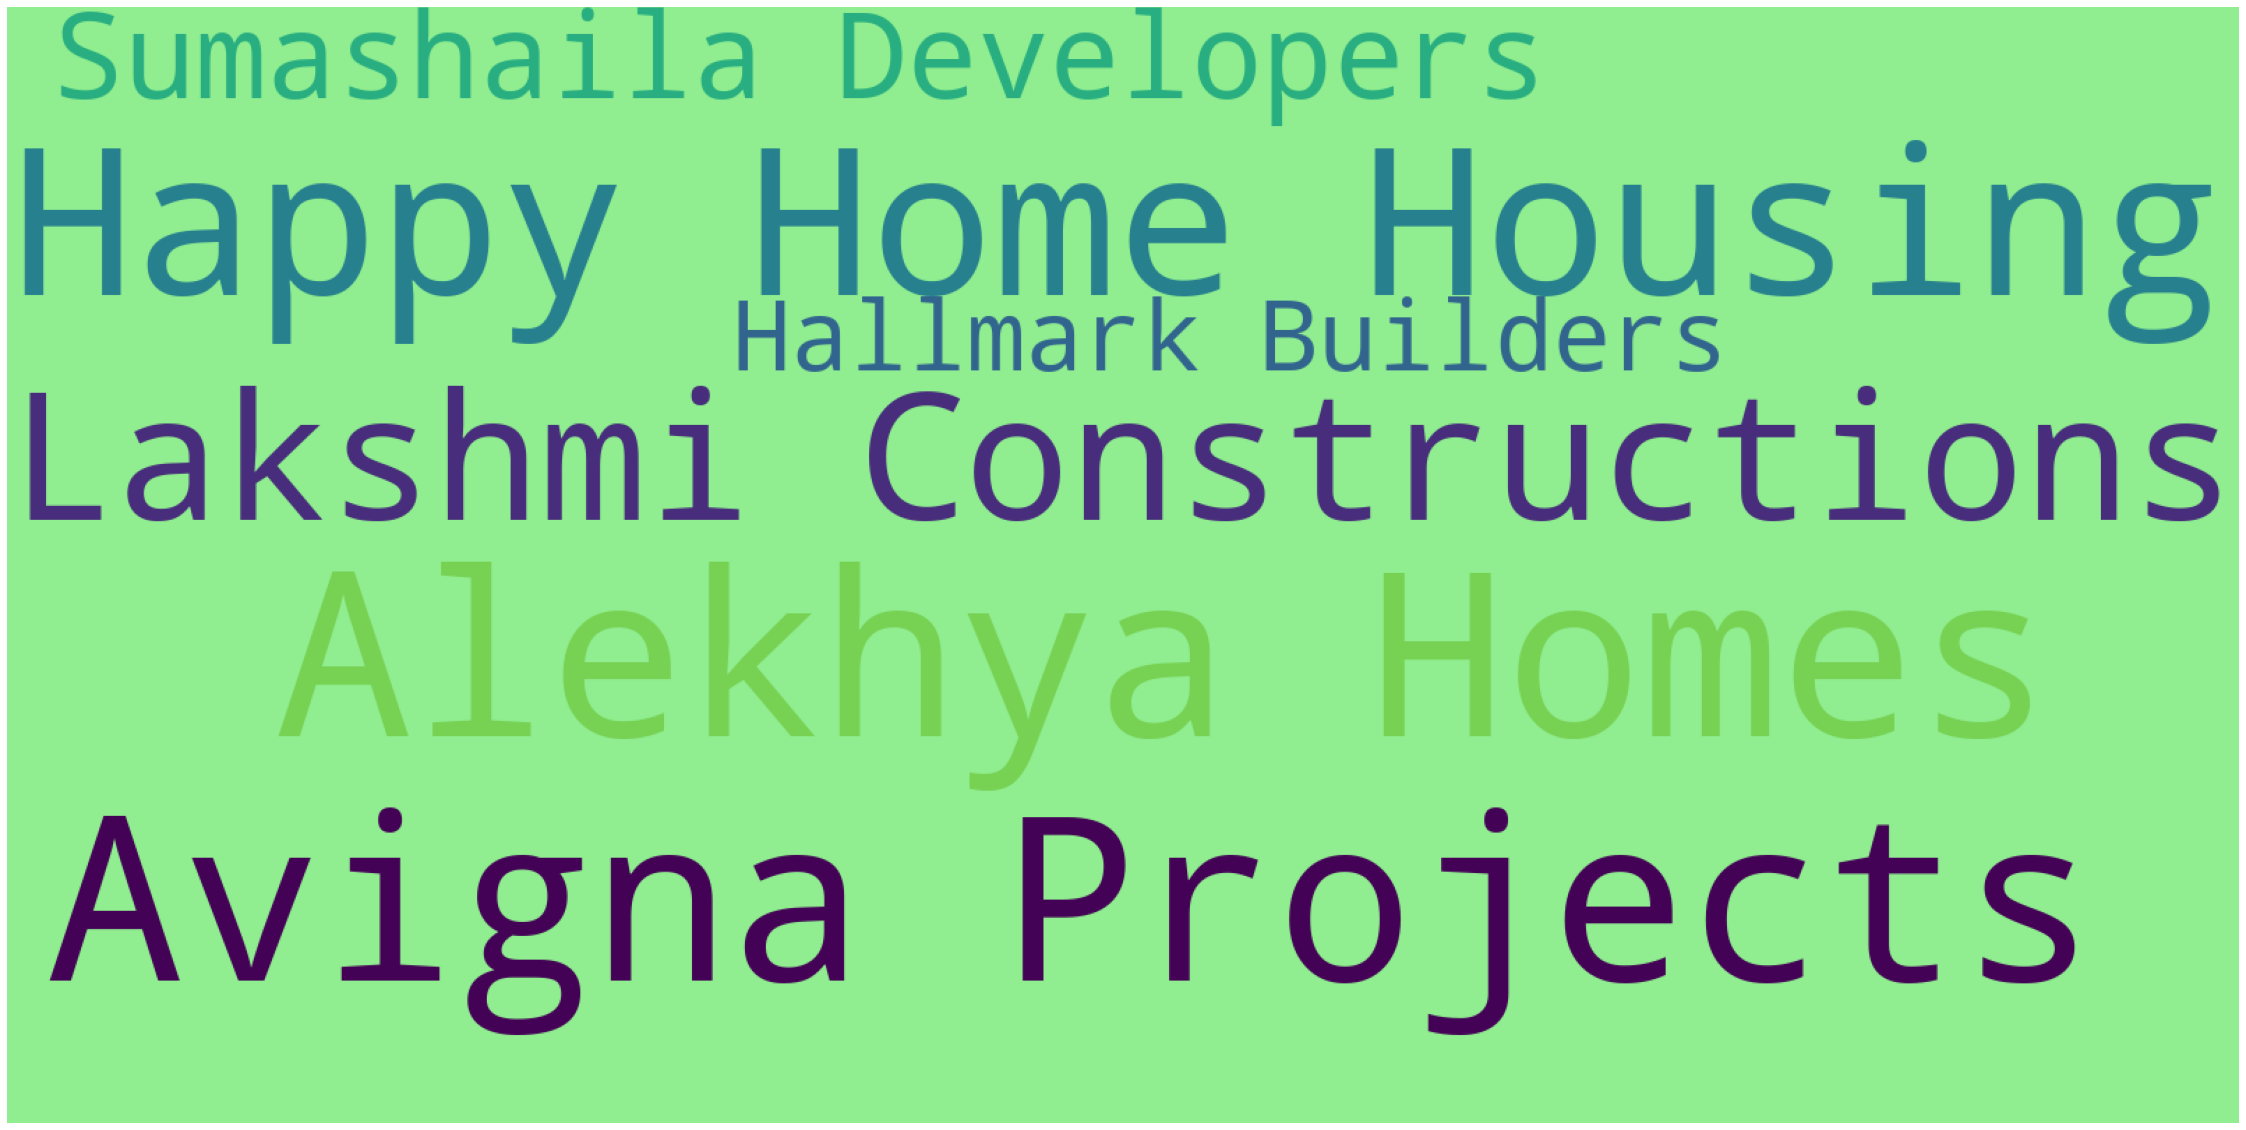

In [25]:
df1['builder'] = df1['builder'].replace(np.nan,'',regex=True)
builder_list = df1['builder'].values.tolist()

count = Counter(builder_list)
wordcloud = WordCloud(width = 1600, height = 800,background_color='lightgreen')\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 